In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import normalize
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [2]:
original_data = pd.read_csv("C:\\Users\\Admin\\Desktop\\upwork_jobs\\lol_project\\data\\high_diamond_ranked_10min.csv")

In [3]:
required_columns = [
                    ## ID and Predictor Variable
                    'blueWins',
                    
                    ## Statistics for Blue Teams
                    'blueWardsPlaced', 'blueWardsDestroyed','blueKills', 'blueDeaths',
                    'blueAssists','blueEliteMonsters', 'blueDragons', 'blueHeralds',
                    'blueTowersDestroyed', 'blueAvgLevel','blueCSPerMin', 'blueGoldPerMin', 
                    
                    ## Shared Statisitics
                    'blueGoldDiff', 'blueExperienceDiff','blueFirstBlood',
                    
                    ## Statistics for Red Teams
                    'redWardsPlaced', 'redWardsDestroyed','redKills', 'redDeaths',
                    'redAssists','redEliteMonsters', 'redDragons','redHeralds',
                    'redTowersDestroyed', 'redAvgLevel','redCSPerMin','redGoldPerMin'
                    ]

In [4]:
modelling_df = original_data[required_columns]

In [5]:
modelling_df.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,...,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redAvgLevel,redCSPerMin,redGoldPerMin
0,0,28,2,9,6,11,0,0,0,0,...,6,9,8,0,0,0,0,6.8,19.7,1656.7
1,0,12,1,5,5,5,0,0,0,0,...,5,5,2,2,1,1,1,6.8,24.0,1762.0
2,0,15,0,7,11,4,1,1,0,0,...,11,7,14,0,0,0,0,6.8,20.3,1728.5
3,0,43,1,4,5,5,1,0,1,0,...,5,4,10,0,0,0,0,7.0,23.5,1647.8
4,0,75,4,6,6,6,0,0,0,0,...,6,6,7,1,1,0,0,7.0,22.5,1740.4


In [6]:
## Logistic Modelling
X = modelling_df[required_columns[1:]].values
Y = modelling_df['blueWins'].values

In [7]:
# Split dataset to train and test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.2, random_state=42)

In [8]:
# Normalize and change data type to floate32
x_train = normalize(x_train, axis=1).astype('float32')
x_test = normalize(x_test, axis=1).astype('float32')

In [9]:
# Baseline model for the neural network. We choose a hidden layer of 10 neurons. The lesser number of neurons helps to eliminate the redundancies in the data and select the more important features.
def create_baseline():
    # create model
    model = Sequential([
        Dense(64, input_shape=(x_train.shape[1],), activation='relu'),
        Dense(32, activation='relu'),
#         Dropout(0.25),
        Dense(1)      
    ])
    
    return model

In [10]:
# Compile model
base_model = create_baseline()

base_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
                   loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [11]:
epochs = 20
# Fit model
history = base_model.fit(x_train, y_train,
               validation_data=(x_test, y_test), batch_size=8, epochs = epochs )

Epoch 1/20
247/247 [==============================] - 1s 5ms/step - loss: 0.5661 - accuracy: 0.7200 - val_loss: 0.5457 - val_accuracy: 0.7204
Epoch 2/20
247/247 [==============================] - 1s 4ms/step - loss: 0.5525 - accuracy: 0.7094 - val_loss: 0.5569 - val_accuracy: 0.7163
Epoch 3/20
247/247 [==============================] - 1s 4ms/step - loss: 0.5465 - accuracy: 0.7159 - val_loss: 0.5399 - val_accuracy: 0.7098
Epoch 4/20
247/247 [==============================] - 1s 4ms/step - loss: 0.5416 - accuracy: 0.7139 - val_loss: 0.5508 - val_accuracy: 0.6976
Epoch 5/20
247/247 [==============================] - 1s 3ms/step - loss: 0.5458 - accuracy: 0.7089 - val_loss: 0.5392 - val_accuracy: 0.7064
Epoch 6/20
247/247 [==============================] - 1s 3ms/step - loss: 0.5435 - accuracy: 0.7185 - val_loss: 0.5499 - val_accuracy: 0.7112
Epoch 7/20
247/247 [==============================] - 1s 3ms/step - loss: 0.5405 - accuracy: 0.7139 - val_loss: 0.5395 - val_accuracy: 0.6999
Epoch 

In [12]:
pred = base_model.predict(x_test)
score = tf.nn.sigmoid(pred)

# convert predictions from probabilty to integers
predictions = np.where(pred < 0.5, 0, 1) # use 0.5 as threshold, could change

In [13]:
#test
predictions[0], y_test[0]

(array([0]), 0)

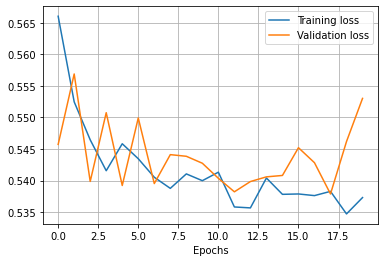

In [14]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.grid()
plt.show()

In [16]:
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Model Accuracy: {round(accuracy, 2)}\nModel F1 Score: {round(f1,2)}")

Model Accuracy: 0.7
Model F1 Score: 0.65
